# 5.4 Linear Regression을 사용한 보스턴 주택 가격 예측

## Ordinary Least Squares(OLS)

- 입력 피처의 독립성에 많은 영향을 받는다.
- 다중공선성(multi-collinearity) : 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다.
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고, 제거하거나 규제를 적용함
- 매우 많은 피처가 다중공선성의 문제를 가지고 있으면 PCA를 통해 차원 축소를 수행하기도 함

### 회귀 성능 지표

1. MAE : Mean Absolute Error, 실제 값과 예측 값의 차이를 절대값으로 변환해 평균
2. MSE : Mean Squared Error, 실제 값과 예측 값의 차이를 제곱해 평균
3. RMSE : Root Mean Squared Error, MSE에 root씌움. MSE 값이 너무 커서
4. $R^2$ : 분산 기반으로 예측 성능 평가. 1에 가까울 수록 예측 정확도가 높음. $R^2 = \frac{예측값 Varience}{실제값 Varience}$

* metrics의 Scoring 함수를 적용 했을 때 neg_...과 같이 neg를 붙이는 이유는 error값이 작을 수록 좋기 때문에 값을 비교할 때 순서를 바꾸기 위함이다. 예를 들어 10 > 1를 -1 > -10으로 바꾼다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# boston 데이터 세트
boston = load_boston()

# to dataframe
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)

# target = price
bostondf['PRICE'] = boston.target
print(bostondf.shape)
bostondf.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


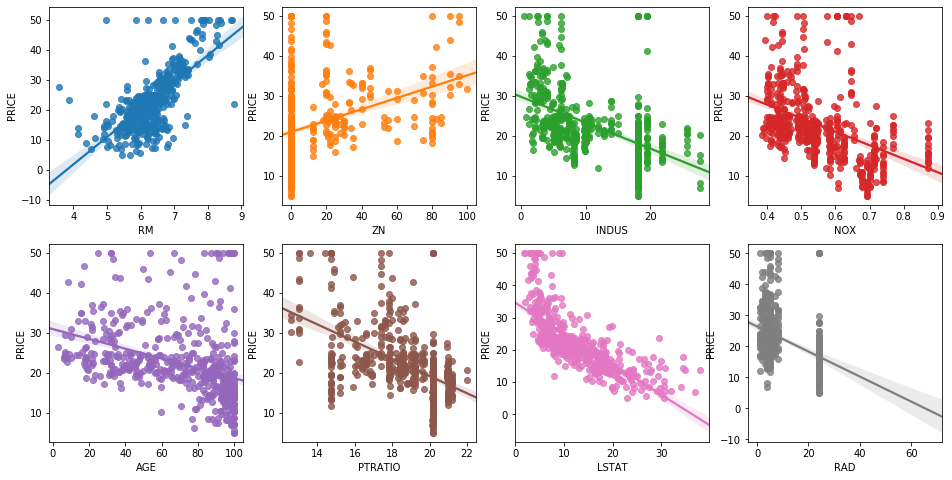

In [6]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostondf, ax=axs[row][col])